# Plot max_like_sim

In [1]:
# %load first_cell.py
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import black
import jupyter_black

jupyter_black.load(
    lab=False,
    line_length=79,
    verbosity="DEBUG",
    target_version=black.TargetVersion.PY310,
)

import numpy as np
import os
import sys
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams["mathtext.fontset"] = "stix"
rcParams["font.family"] = "STIXGeneral"


def print_shape(*args):
    nelem = len(args)
    for ii in range(nelem - 1):
        print(args[ii].shape, end=" ")
    print(args[nelem - 1].shape)


def ls_level(folder, nlevels):
    for ii in range(nlevels):
        folder = os.path.dirname(folder)
    folder += "/"
    return folder


path_program = ls_level(os.getcwd(), 1)
print(path_program)
sys.path.append(path_program)

DEBUG:jupyter_black:Using config from /home/jchaves/Proyectos/projects/lya/cup1d/pyproject.toml
DEBUG:jupyter_black:config: {'line_length': 79, 'target_versions': {<TargetVersion.PY310: 10>}}


<IPython.core.display.Javascript object>

/home/jchaves/Proyectos/projects/lya/cup1d/notebooks/


## Read Data

### Options

In [13]:
from cup1d.scripts.call_max_like_sim import Args
from cup1d.scripts.max_like_sim import fname_minimize
from matplotlib.ticker import MaxNLocator

In [6]:
# list of options to set
training_set = "Cabayol23"
emulator_label = "Cabayol23"
add_hires = False
# emulator_label = "Cabayol23_extended"
# add_hires = True
use_polyfit = True
cov_label = "Chabanier2019"
arr_drop_sim = [True, False]
arr_n_igm = [0, 1, 2, 3]
override = False

if (training_set == "Pedersen21") | (training_set == "Cabayol23"):
    list_sims = [
        "mpg_0",
        "mpg_1",
        "mpg_2",
        "mpg_3",
        "mpg_4",
        "mpg_5",
        "mpg_6",
        "mpg_7",
        "mpg_8",
        "mpg_9",
        "mpg_10",
        "mpg_11",
        "mpg_12",
        "mpg_13",
        "mpg_14",
        "mpg_15",
        "mpg_16",
        "mpg_17",
        "mpg_18",
        "mpg_19",
        "mpg_20",
        "mpg_21",
        "mpg_22",
        "mpg_23",
        "mpg_24",
        "mpg_25",
        "mpg_26",
        "mpg_27",
        "mpg_28",
        "mpg_29",
        "mpg_central",
        "mpg_seed",
        "mpg_growth",
        "mpg_neutrinos",
        "mpg_curved",
        "mpg_running",
        "mpg_reio",
    ]
elif training_set[:5] == "Nyx23":
    list_sims = [
        "nyx_0",
        "nyx_1",
        "nyx_2",
        "nyx_3",
        "nyx_4",
        "nyx_5",
        "nyx_6",
        "nyx_7",
        "nyx_8",
        "nyx_9",
        "nyx_10",
        "nyx_11",
        "nyx_12",
        "nyx_13",
        "nyx_14",
        "nyx_15",
        "nyx_16",
        "nyx_17",
        "nyx_central",
        "nyx_seed",
        "nyx_wdm",
    ]

### Load

In [7]:
# save = {
#     "metadata": out_args,
#     "best_chi2": best_chi2,
#     "name_parameters": free_parameters,
#     "truth_parameters": truth_values,
#     "best_parameters": best_fit_values,
#     "err_best_parameters": err_best_fit_values,
#     "covariance": np.array(minimizer.minimizer.covariance),
# }

In [83]:
arr_drop_sim = [True, False]
arr_n_igm = [0, 1, 2, 3]

# chi2, As, ns
chi2 = np.zeros((len(arr_drop_sim), len(arr_n_igm), len(list_sims)))
# diff_As, diff_ns
dat = np.zeros((len(arr_drop_sim), len(arr_n_igm), len(list_sims), 2))
# err_As, err_ns
err = np.zeros((len(arr_drop_sim), len(arr_n_igm), len(list_sims), 2))

for ii, drop_sim in enumerate(arr_drop_sim):
    for jj, n_igm in enumerate(arr_n_igm):
        for kk, sim_label in enumerate(list_sims):
            args = Args()

            args.training_set = training_set
            args.emulator_label = emulator_label
            args.add_hires = add_hires
            args.use_polyfit = use_polyfit
            args.cov_label = cov_label

            args.drop_sim = drop_sim
            args.n_igm = n_igm
            args.test_sim_label = sim_label

            fname = fname_minimize(args)
            file = np.load(fname, allow_pickle=True).item()
            chi2[ii, jj, kk] = file["best_chi2"]
            diff = file["best_parameters"][:2] - file["truth_parameters"][:2]
            dat[ii, jj, kk] = diff
            err[ii, jj, kk] = file["err_best_parameters"][:2]

## Plot

In [92]:
folder = os.environ["CUP1D_PATH"] + "/data/minimize/Cabayol23_lres/"

In [121]:
np.sqrt(err[ii, jj, :, 1])

array([0.00185302, 0.00179776, 0.00785325, 0.00065983, 0.00231606,
       0.00138249, 0.00145404, 0.00227979, 0.00205483, 0.09999334,
       0.0031699 , 0.00266793, 0.00190718, 0.00174713, 0.0009674 ,
       0.00252649, 0.00181679, 0.0008202 , 0.02591418, 0.01324544,
       0.00151768, 0.06861375, 0.00229566, 0.00131352, 0.0015547 ,
       0.00325934, 0.0009143 , 0.00133143, 0.02717146, 0.00074945,
       0.03028486, 0.07618598, 0.03898208, 0.07758503, 0.01687673,
       0.07746521, 0.04403313])

<IPython.core.display.Javascript object>


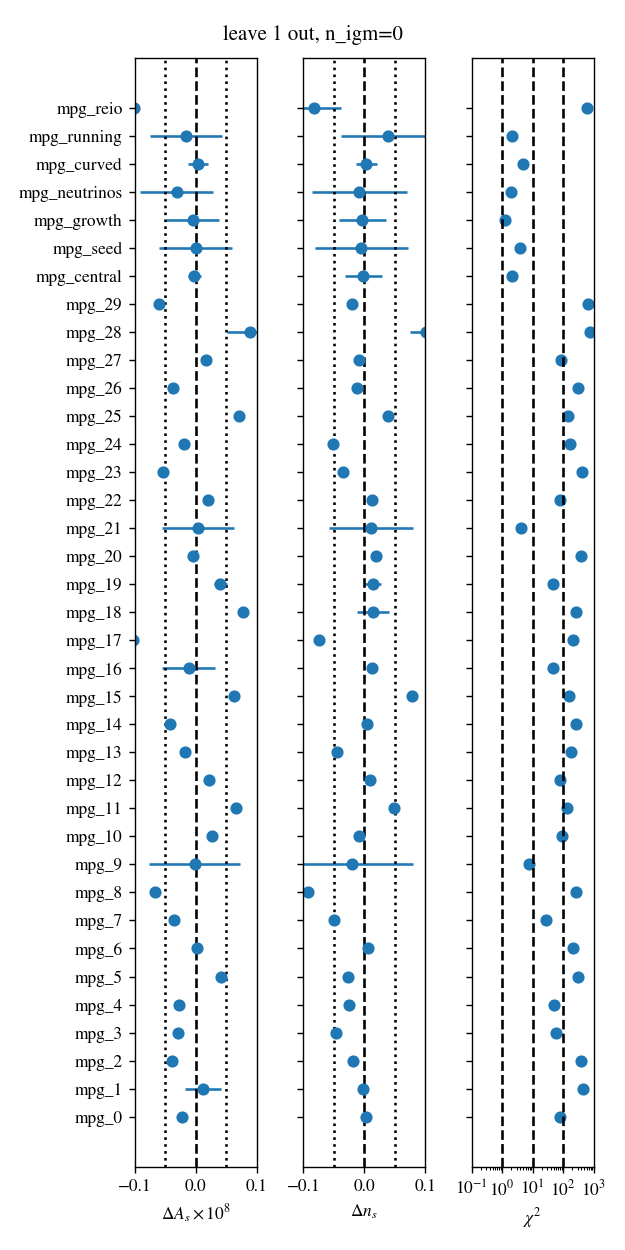

In [120]:
for ii in range(len(arr_drop_sim)):
    for jj in range(len(arr_n_igm)):

        samples = list_sims
        values1 = dat[ii, jj, :, 0] * 1e8
        err1 = np.sqrt(err[ii, jj, :, 0] * 1e8)
        values2 = dat[ii, jj, :, 1]
        err2 = np.sqrt(err[ii, jj, :, 1])
        values3 = chi2[ii, jj, :]

        fig, ax = plt.subplots(1, 3, sharey=True, figsize=(5, 10))

        # Create a scatter plot with two points for each sample
        ax[0].errorbar(
            values1, samples, yerr=None, xerr=err1, ls="", marker="o"
        )
        #         ax[0].scatter(values1, samples, marker="o", color="r")
        ax[1].errorbar(
            values2, samples, yerr=None, xerr=err2, ls="", marker="o"
        )

        #         ax[1].scatter(values2, samples)
        ax[2].scatter(values3, samples)
        lvls = [-0.05, 0, 0.05]
        lss = [":", "--", ":"]
        for ls, lvl in zip(lss, lvls):
            ax[0].axvline(lvl, ls=ls, color="k")
            ax[1].axvline(lvl, ls=ls, color="k")
        lvls = [1, 10, 100]
        for lvl in lvls:
            ax[2].axvline(lvl, ls="--", color="k")
        ax[0].set_xlabel(r"$\Delta A_s \times 10^8$")
        ax[1].set_xlabel(r"$\Delta n_s$")
        ax[2].set_xlabel(r"$\chi^2$")
        ax[2].set_xscale("log")
        ax[0].set_xlim([-0.1, 0.1])
        ax[1].set_xlim([-0.1, 0.1])
        ax[2].set_xlim([0.1, 1e3])

        if arr_drop_sim[ii]:
            flag = "leave 1 out,"
            flag2 = "yl1O"
        else:
            flag = "no leave 1 out,"
            flag2 = "nl1O"

        plt.suptitle(flag + " n_igm=" + str(arr_n_igm[jj]))
        plt.tight_layout()
        #         plt.savefig(folder + flag2 + "nigm" + str(arr_n_igm[jj]) + ".png")
        break
    break

'/home/jchaves/Proyectos/projects/lya/cup1d'